In [118]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost catboost tensorflow prophet statsmodels statsforecast polars nbformat plotly

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsforecast import StatsForecast
from statsforecast.models import Theta
import os
import nbformat

In [120]:
df=pd.read_csv("/content/golden.csv")

In [121]:
results = {
    "Model": [],
    "RMSE": [],
    "R2": []
}

In [122]:
print(df)

           Date  Price 10g (in INR)  GGP (LBMA)  USD to INR  Import duty  \
0    01-03-2023               56047     1833.50      82.420         15.0   
1    02-03-2023               55915     1831.75      82.355         15.0   
2    03-03-2023               55879     1845.55      81.713         15.0   
3    04-03-2023               55879     1845.55      81.713         15.0   
4    05-03-2023               55879     1845.55      81.713         15.0   
..          ...                 ...         ...         ...          ...   
803  12-05-2025               96190     3222.00      84.800          6.0   
804  13-05-2025               96845     3254.00      85.275          6.0   
805  14-05-2025               95900     3230.00      85.395          6.0   
806  15-05-2025               95395     3171.00      85.540          6.0   
807  16-05-2025               95775     3210.00      85.500          6.0   

     Inflation Rate (CPI)          NIF  
0                    5.66  17450.90039  
1    

In [123]:
df.head()

,Date,Price 10g (in INR),GGP (LBMA),USD to INR,Import duty,Inflation Rate (CPI),NIF
0,01-03-2023,56047,1833.50,82.420,15.0,5.66,17450.90039
1,02-03-2023,55915,1831.75,82.355,15.0,5.66,17321.90039
2,03-03-2023,55879,1845.55,81.713,15.0,5.66,17594.34961
3,04-03-2023,55879,1845.55,81.713,15.0,5.66,17594.34961
4,05-03-2023,55879,1845.55,81.713,15.0,5.66,17594.34961


In [124]:
df.describe()

,Price 10g (in INR),GGP (LBMA),USD to INR,Import duty,Inflation Rate (CPI),NIF
count,808.000000,808.000000,808.000000,807.000000,808.000000,808.000000
mean,69539.611386,2327.027785,83.709418,11.698885,4.918837,21794.174778
std,10929.625290,401.386618,1.350767,4.340048,1.018127,2392.329718
min,54955.000000,1813.350000,81.678000,6.000000,3.100000,16945.050780
25%,60122.250000,1981.850000,82.890000,6.000000,4.310000,19591.700682
50%,68629.000000,2290.500000,83.344000,15.000000,4.870000,22314.700195
75%,75998.500000,2637.050000,84.074000,15.000000,5.490000,23822.962890
max,101375.000000,3454.000000,87.789000,15.000000,7.440000,26216.050780


In [125]:
df.shape

(808, 7)

In [126]:
df.values

array([['01-03-2023', 56047, 1833.5, ..., 15.0, 5.66, 17450.90039],
       ['02-03-2023', 55915, 1831.75, ..., 15.0, 5.66, 17321.90039],
       ['03-03-2023', 55879, 1845.55, ..., 15.0, 5.66, 17594.34961],
       ...,
       ['14-05-2025', 95900, 3230.0, ..., 6.0, 3.1, 24666.90039],
       ['15-05-2025', 95395, 3171.0, ..., 6.0, 3.1, 25062.09961],
       ['16-05-2025', 95775, 3210.0, ..., 6.0, 3.1, 25062.09961]],
      dtype=object)

In [127]:
df.isnull()

,Date,Price 10g (in INR),GGP (LBMA),USD to INR,Import duty,Inflation Rate (CPI),NIF
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
803,False,False,False,False,False,False,False
804,False,False,False,False,False,False,False
805,False,False,False,False,False,False,False
806,False,False,False,False,False,False,False


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  808 non-null    object 
 1   Price 10g (in INR)    808 non-null    int64  
 2   GGP (LBMA)            808 non-null    float64
 3   USD to INR            808 non-null    float64
 4   Import duty           807 non-null    float64
 5   Inflation Rate (CPI)  808 non-null    float64
 6   NIF                   808 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 44.3+ KB


In [129]:
df.columns

Index(['Date', 'Price 10g (in INR)', 'GGP (LBMA)', 'USD to INR', 'Import duty',
       'Inflation Rate (CPI)', 'NIF'],
      dtype='object')

In [130]:
df.isnull().sum()

,0
Date,0
Price 10g (in INR),0
GGP (LBMA),0
USD to INR,0
Import duty,1
Inflation Rate (CPI),0
NIF,0


In [131]:
df.columns = [
    "Date", "Gold_Price_10g_INR", "GGP_LBMA",
    "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"
]

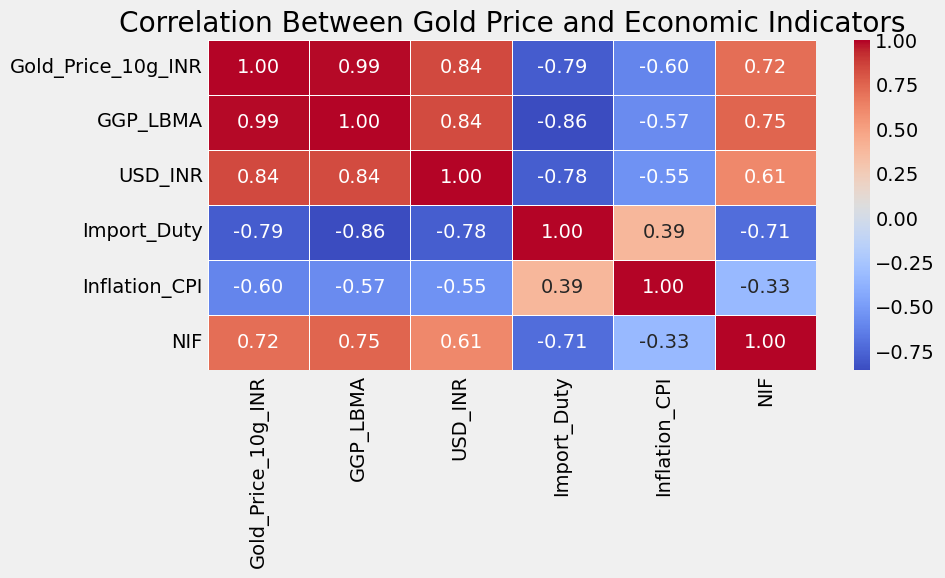

In [132]:
corr_data = df[[
    "Gold_Price_10g_INR", "GGP_LBMA", "USD_INR",
    "Import_Duty", "Inflation_CPI", "NIF"
]].copy() # Use .copy() to avoid SettingWithCopyWarning
numeric_cols = ["Gold_Price_10g_INR", "GGP_LBMA", "USD_INR",
                "Import_Duty", "Inflation_CPI", "NIF"]
for col in numeric_cols:
    if col in corr_data.columns:
        corr_data[col] = corr_data[col].astype(str).str.replace(',', '', regex=False)
        corr_data[col] = pd.to_numeric(corr_data[col], errors='coerce')
corr_matrix = corr_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Gold Price and Economic Indicators")
plt.tight_layout()
plt.show()

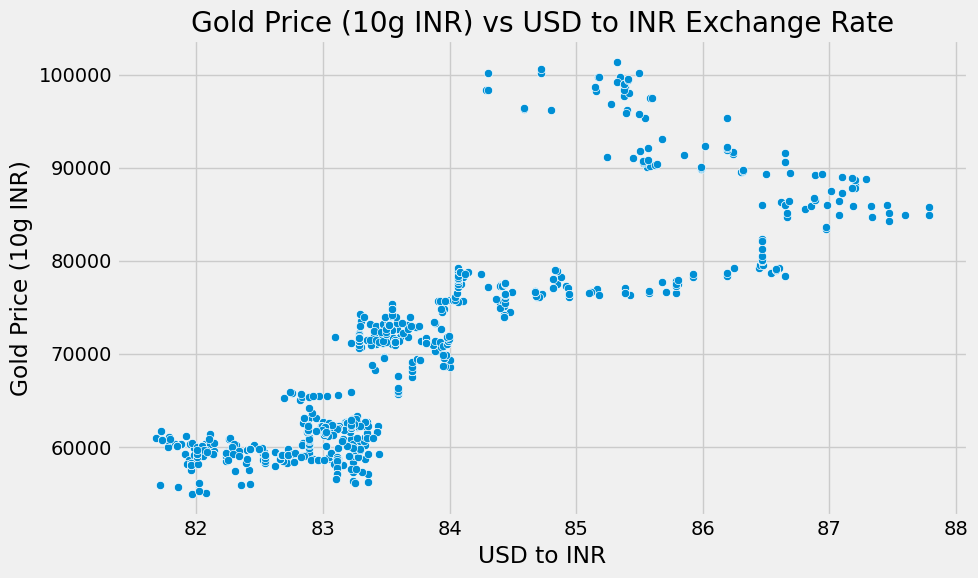

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="USD_INR", y="Gold_Price_10g_INR", data=df)
plt.title("Gold Price (10g INR) vs USD to INR Exchange Rate")
plt.xlabel("USD to INR")
plt.ylabel("Gold Price (10g INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

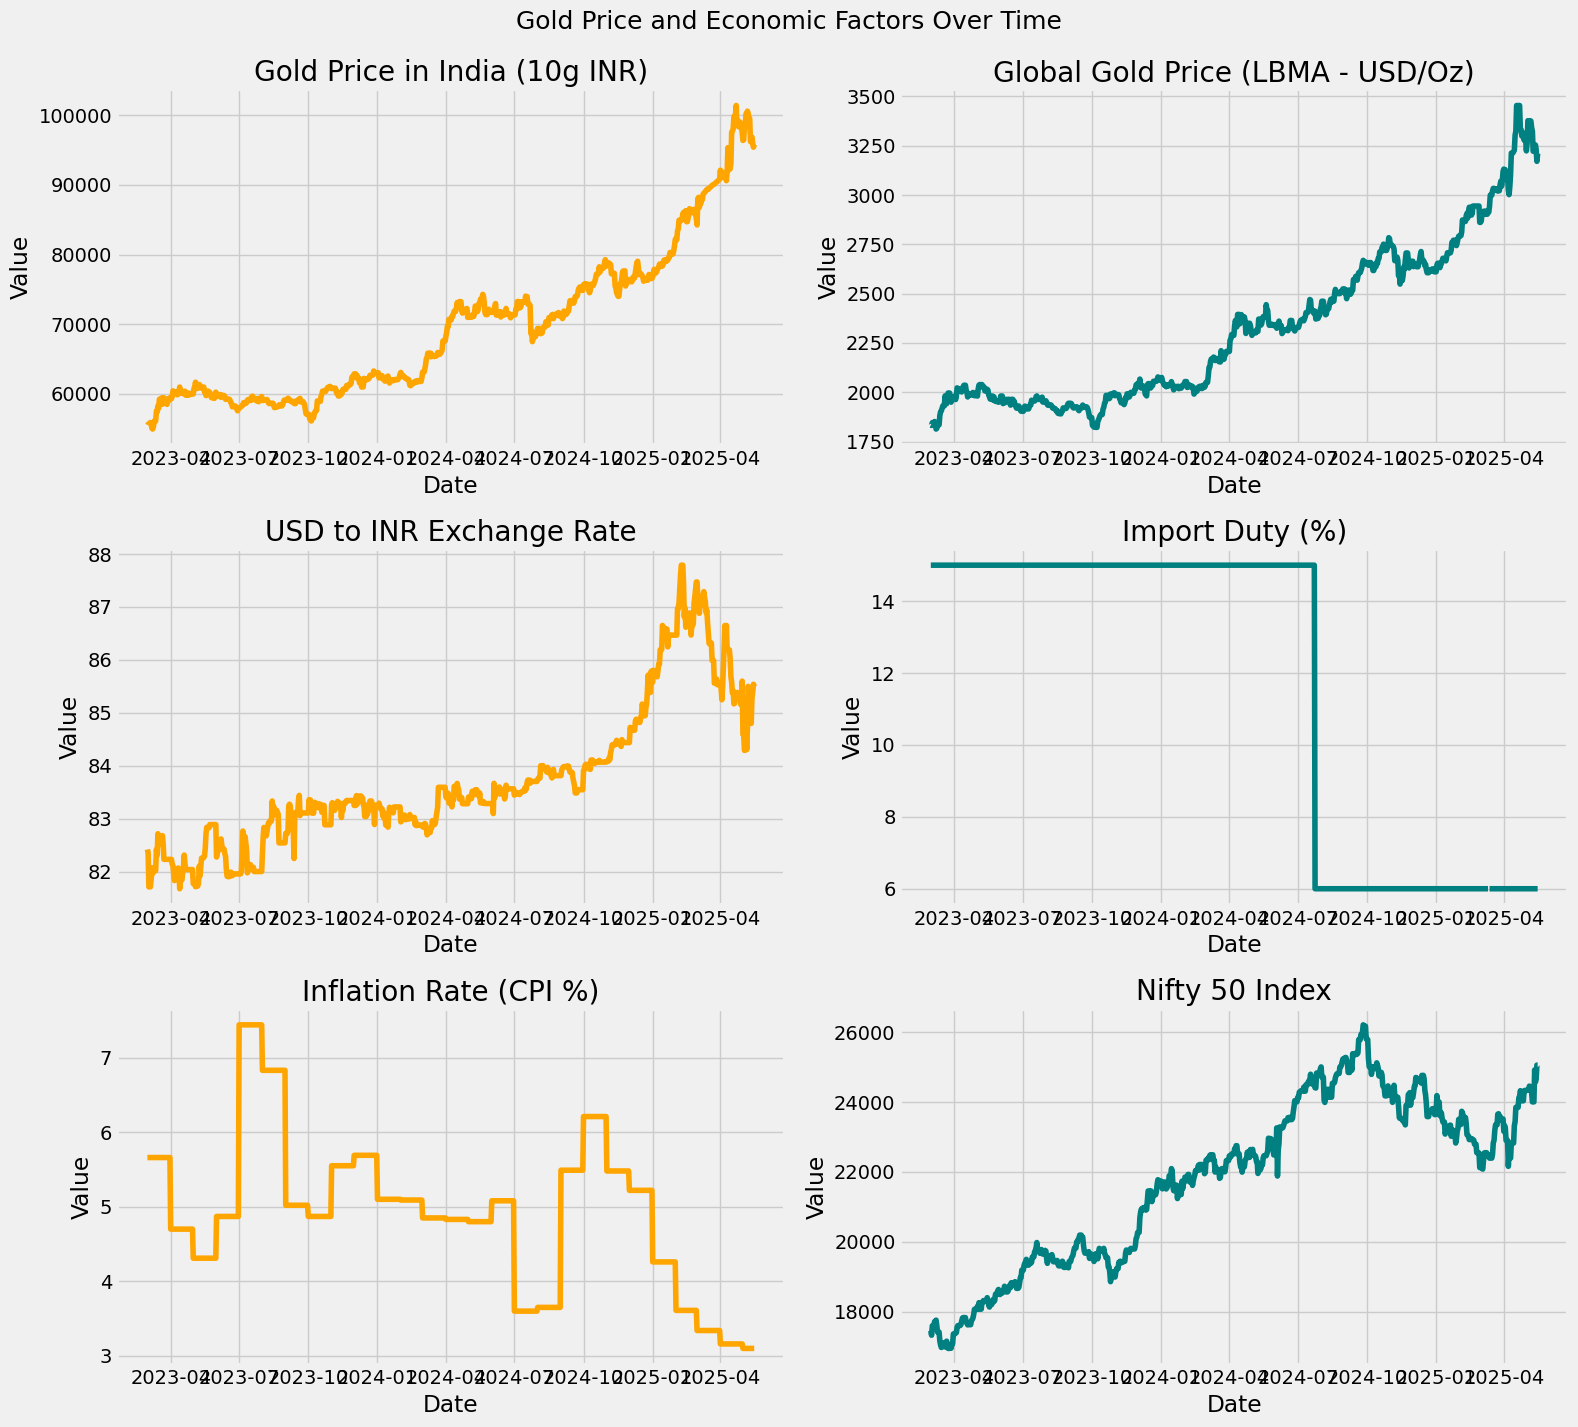

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 14))
columns = [
    ("Gold_Price_10g_INR", "Gold Price in India (10g INR)"),
    ("GGP_LBMA", "Global Gold Price (LBMA - USD/Oz)"),
    ("USD_INR", "USD to INR Exchange Rate"),
    ("Import_Duty", "Import Duty (%)"),
    ("Inflation_CPI", "Inflation Rate (CPI %)"),
    ("NIF", "Nifty 50 Index")
]
for i, (col, title) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    if col in df.columns:
        plt.plot(df.index, df[col].astype(float), label=title, color='teal' if i % 2 == 0 else 'orange')
        plt.title(title)
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.grid(True)
        plt.tight_layout()
    else:
        plt.text(0.5, 0.5, f"{col} not found", ha='center', va='center')
plt.suptitle("Gold Price and Economic Factors Over Time", fontsize=18, y=1.02)
plt.show()

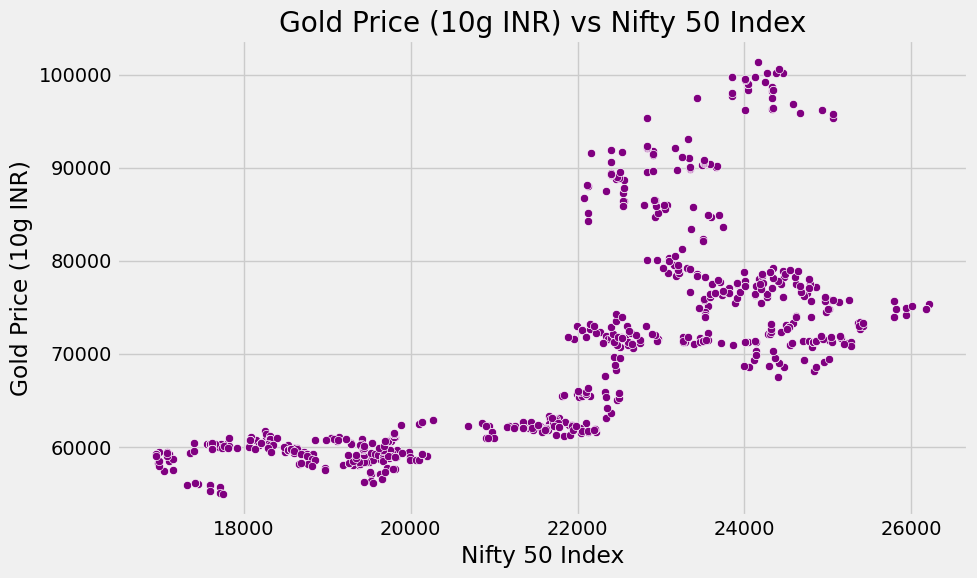

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="NIF", y="Gold_Price_10g_INR", data=df, color="purple")
plt.title("Gold Price (10g INR) vs Nifty 50 Index")
plt.xlabel("Nifty 50 Index")
plt.ylabel("Gold Price (10g INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

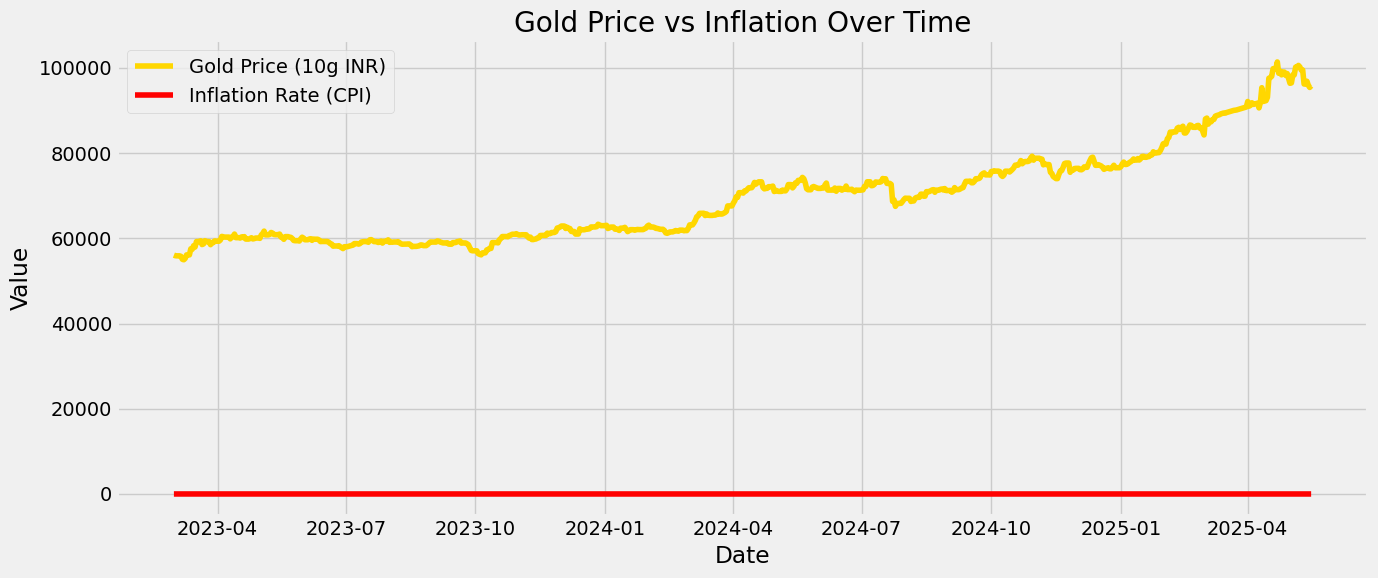

In [137]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Gold_Price_10g_INR"], label="Gold Price (10g INR)", color="gold")
plt.plot(df.index, df["Inflation_CPI"], label="Inflation Rate (CPI)", color="red")
plt.title("Gold Price vs Inflation Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [138]:
X = df[["GGP_LBMA", "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"]]
y = df["Gold_Price_10g_INR"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**LINEAR REGRESSION**

In [139]:
X = df[["GGP_LBMA", "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"]]
y = df["Gold_Price_10g_INR"]
data_combined = pd.concat([X, y], axis=1).dropna()
X_cleaned = data_combined[["GGP_LBMA", "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"]]
y_cleaned = data_combined["Gold_Price_10g_INR"]
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_lr = model.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # RMSE
r2_lr = r2_score(y_test, y_pred_lr)  # R²
print(f"Linear Regression -> RMSE: {rmse_lr:.2f}")
print(f"Linear Regression -> R² Score: {r2_lr:.2f}")
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lr = model.predict(X_test_scaled)
r2_lr   = r2_score(y_test, y_pred_lr)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
results["Model"].append("Linear Regression")
results["RMSE"].append(rmse)
results["R2"].append(r2)

Linear Regression -> RMSE: 666.38
Linear Regression -> R² Score: 1.00


**Random Forest**

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
results["Model"].append("Random Forest")
results["RMSE"].append(rmse)
results["R2"].append(r2)

Random Forest MSE: 298273.42
Random Forest RMSE: 546.14
Random Forest R² Score: 1.00
R² Score: 1.00


**Prophet**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o2zwdoz/j_4ca59d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o2zwdoz/o4klbqsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61292', 'data', 'file=/tmp/tmp6o2zwdoz/j_4ca59d.json', 'init=/tmp/tmp6o2zwdoz/o4klbqsw.json', 'output', 'file=/tmp/tmp6o2zwdoz/prophet_model0shnev9_/prophet_model-20250517164248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-141-b78213d2f65f>:53: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.

Prophet RMSE on last 60 days (pre-15 May): 1042.89
Prophet R² on last 60 days (pre-15 May): 0.93


<ipython-input-141-b78213d2f65f>:72: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.




Predictions 16 May – 14 Jun 2025:
            ds          yhat    yhat_lower    yhat_upper
806 2025-05-16  96802.739075  96192.977479  97495.711517
807 2025-05-17  96763.200766  96130.259424  97425.140328
808 2025-05-18  96768.495665  96111.224732  97441.059327
809 2025-05-19  96854.881181  96140.603649  97485.799621
810 2025-05-20  96835.655540  96194.876058  97472.386217
811 2025-05-21  96846.258468  96177.142772  97508.161706
812 2025-05-22  96888.965330  96229.521313  97560.412732
813 2025-05-23  96908.642186  96287.963540  97615.542043
814 2025-05-24  96877.565627  96231.281893  97565.465083
815 2025-05-25  96889.914890  96203.251968  97570.917232


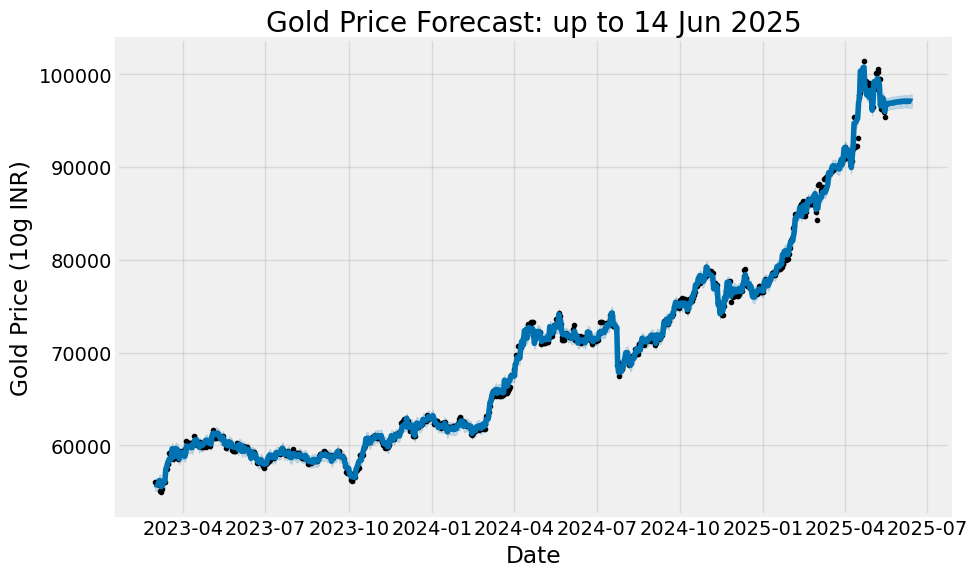

In [141]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd # Make sure pandas is imported here if not already
df = pd.read_csv("/content/golden.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
cols = {
    "Price 10g (in INR)": "y",
    "USD to INR": "USD_INR",
    "Import duty": "Import_Duty",
    "Inflation Rate (CPI)": "Inflation_CPI",
    "GGP (LBMA)": "GGP_LBMA", # Add GGP_LBMA based on its use as a regressor later
    "NIF": "NIF" # Add NIF based on its use as a regressor later
}
for old_name, new_name in cols.items():
    if old_name in df.columns:
        df[new_name] = (df[old_name]
                        .astype(str)
                        .str.replace(",", "", regex=False))
        df[new_name] = pd.to_numeric(df[new_name], errors="coerce")
    else:
        print(f"Warning: Column '{old_name}' not found in the dataframe.")
df.rename(columns={"Date": "ds"}, inplace=True)
df.dropna(inplace=True) # Drop rows where any of the converted numeric values became NaN
cutoff = pd.to_datetime("2025-05-15")
if cutoff > df['ds'].max():
    print(f"Warning: Cutoff date {cutoff.date()} is after the last date in the data {df['ds'].max().date()}. Adjusting cutoff.")
    cutoff = df['ds'].max()
train_df = df[df["ds"] <= cutoff].copy()
if len(train_df) < 60:
    print(f"Error: Training data after cutoff is less than 60 days ({len(train_df)} days). Cannot create 60-day test set.")
    test_df = train_df.iloc[-len(train_df):].copy() # Use whatever is available
else:
    test_df  = train_df.iloc[-60:].copy()     # last 60 days for evaluation
from prophet import Prophet # Make sure Prophet is imported here if not already
model = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_mode='additive',
    yearly_seasonality=True
)
regressors = ["USD_INR", "Import_Duty", "Inflation_CPI", "GGP_LBMA", "NIF"] # Use NIF instead of Nifty
for reg in regressors:
    if reg in train_df.columns and reg != 'ds' and reg != 'y':
         model.add_regressor(reg)
    else:
        print(f"Warning: Regressor '{reg}' not found in the training data.")
model.fit(train_df)
future_eval = model.make_future_dataframe(
    periods=len(test_df),
)
future_eval = future_eval.merge(
    df[["ds"] + regressors], # Use the regressors from the full cleaned df
    on="ds", how="left"
)
future_eval[regressors] = future_eval[regressors].fillna(method="ffill")
eval_fc = model.predict(future_eval)
eval_fc_test_period = eval_fc[eval_fc['ds'].isin(test_df['ds'])]
if len(test_df) == len(eval_fc_test_period):
    mse = mean_squared_error(test_df["y"], eval_fc_test_period["yhat"])
    rmse = np.sqrt(mse)
    r2   = r2_score(test_df["y"], eval_fc_test_period["yhat"])
    print(f"Prophet RMSE on last 60 days (pre-15 May): {rmse:.2f}")
    print(f"Prophet R² on last 60 days (pre-15 May): {r2:.2f}")
    results["Model"].append("Prophet")
    results["RMSE"].append(rmse)
    results["R2"].append(r2)
future_30 = model.make_future_dataframe(
    periods=30,
)
future_30 = future_30.merge(
    df[["ds"] + regressors], # Use regressors from the full cleaned df if available
    on="ds", how="left"
)
future_30[regressors] = future_30[regressors].fillna(method="ffill")
forecast_30 = model.predict(future_30)
fc_next30  = forecast_30[forecast_30["ds"] > cutoff]
print("\nPredictions 16 May – 14 Jun 2025:")
print(fc_next30[["ds", "yhat", "yhat_lower", "yhat_upper"]].head(10))
fig = model.plot(forecast_30)
plt.title("Gold Price Forecast: up to 14 Jun 2025")
plt.xlabel("Date")
plt.ylabel("Gold Price (10g INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [142]:
target_date = pd.to_datetime("2025-05-15")
result = forecast_30[forecast_30["ds"] == target_date]
if not result.empty:
    print(f"📆 Predicted Price on {target_date.date()}: ₹{result['yhat'].values[0]:,.2f}")
else:
    print("❌ Target date not found in forecast range.")

📆 Predicted Price on 2025-05-15: ₹95,993.03


In [143]:
from prophet import Prophet
import pandas as pd
df = pd.read_csv("/content/golden.csv")
df = df[["Date", "Price 10g (in INR)"]].copy()
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"], dayfirst=True)
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
forecast.to_csv("forecast.csv", index=False)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o2zwdoz/xo94r0z3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o2zwdoz/h97kj9kk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91437', 'data', 'file=/tmp/tmp6o2zwdoz/xo94r0z3.json', 'init=/tmp/tmp6o2zwdoz/h97kj9kk.json', 'output', 'file=/tmp/tmp6o2zwdoz/prophet_modelikvkanpa/prophet_model-20250517164252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**ARIMA**

ARIMA MSE: 164455619.93
ARIMA RMSE: 12824.03
ARIMA R² Score: -1.8312


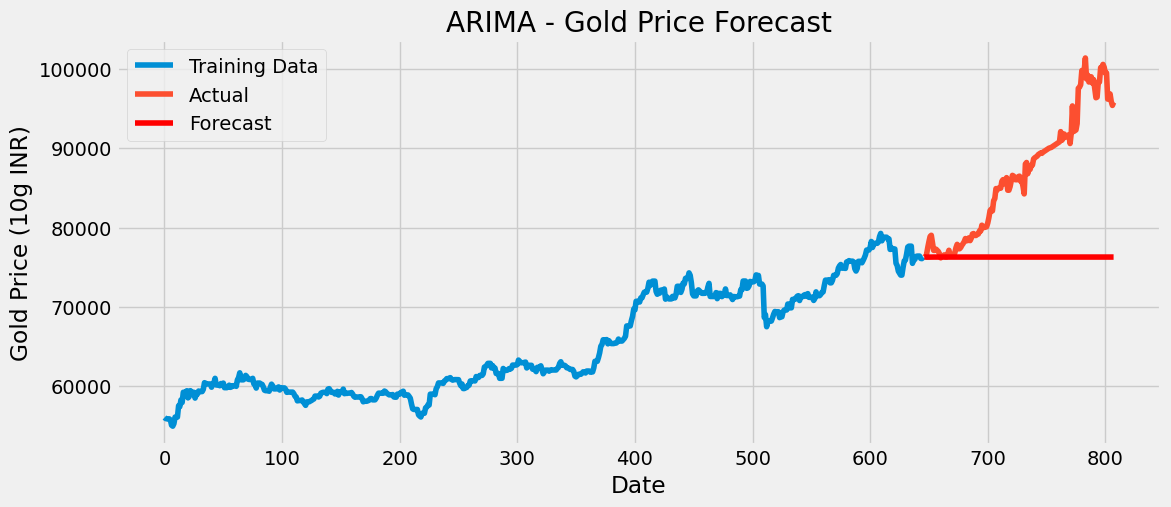

In [144]:
from statsmodels.tsa.arima.model import ARIMA
series = df["y"]
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)
print(f"ARIMA MSE: {mse:.2f}")
print(f"ARIMA RMSE: {rmse:.2f}")
print(f"ARIMA R² Score: {r2:.4f}")
results["Model"].append("ARIMA")
results["RMSE"].append(rmse)
results["R2"].append(r2)
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.title("ARIMA - Gold Price Forecast")
plt.xlabel("Date")
plt.ylabel("Gold Price (10g INR)")
plt.legend()
plt.grid(True)
plt.show()

**SARIMAX**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



📉 SARIMAX MSE: 139162675.19
📉 SARIMAX RMSE: 11796.72
📈 SARIMAX R² Score: -1.3957


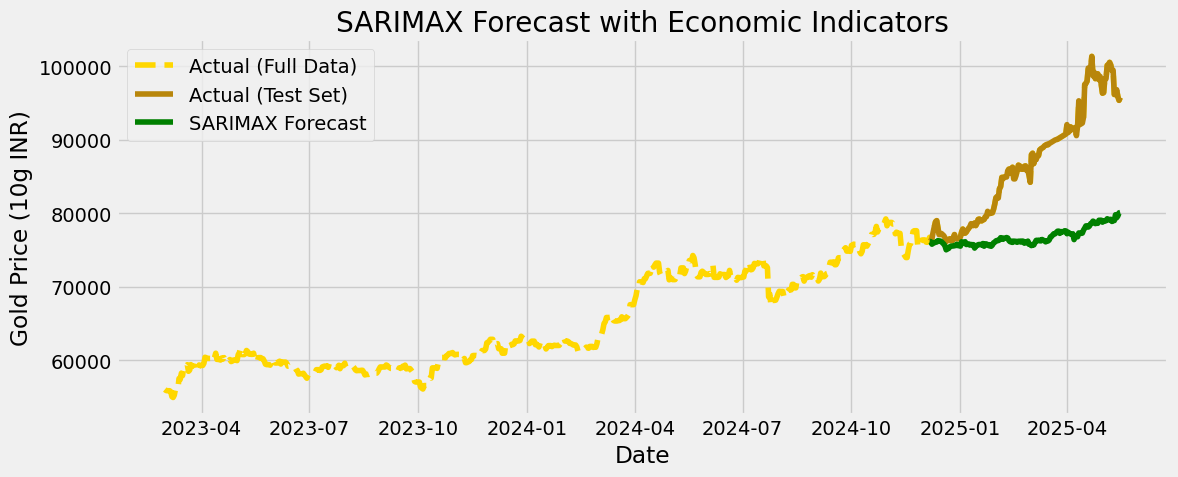

In [145]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('/content/golden.csv')
df.rename(columns={
    "Date": "ds",
    "Price 10g (in INR)": "y",
    "USD to INR": "USD_INR",
    "GGP (LBMA)": "GGP_LBMA",
    "Import duty": "Import_Duty",
    "Inflation Rate (CPI)": "Inflation_CPI",
    "NIF": "NIF" # Assuming NIF is the correct column name based on previous cells
}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)
df.set_index('ds', inplace=True)
numeric_cols_to_clean = ["y", "USD_INR", "GGP_LBMA", "Import_Duty", "Inflation_CPI", "NIF"]
for col in numeric_cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
y = df["y"]
X_cols = ["USD_INR", "Inflation_CPI", "NIF"]
X = df[X_cols]
df_model = pd.concat([y, X], axis=1).dropna()
y = df_model["y"]
X = df_model[X_cols] # Use the correct column names after dropping NaNs
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]
sarimax_model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarimax_result = sarimax_model.fit(disp=False)
sarimax_forecast = sarimax_result.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test)
sarimax_mse = mean_squared_error(y_test, sarimax_forecast)
sarimax_rmse = np.sqrt(sarimax_mse)
sarimax_r2 = r2_score(y_test, sarimax_forecast)
print(f"📉 SARIMAX MSE: {sarimax_mse:.2f}")
print(f"📉 SARIMAX RMSE: {sarimax_rmse:.2f}")
print(f"📈 SARIMAX R² Score: {sarimax_r2:.4f}")
results["Model"].append("SARIMAX")
results["RMSE"].append(sarimax_rmse)
results["R2"].append(sarimax_r2)
plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label="Actual (Full Data)", color="gold", linestyle='--')
plt.plot(y_test.index, y_test, label="Actual (Test Set)", color="darkgoldenrod")
plt.plot(y_test.index, sarimax_forecast, label="SARIMAX Forecast", color="green")
plt.title("SARIMAX Forecast with Economic Indicators")
plt.xlabel("Date")
plt.ylabel("Gold Price (10g INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**XGBOOST**

In [146]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
df = pd.read_csv("/content/golden.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df["Gold_Price_lag1"] = df["Price 10g (in INR)"].shift(1)
df["Gold_Price_lag2"] = df["Price 10g (in INR)"].shift(2)
df["Gold_Price_lag3"] = df["Price 10g (in INR)"].shift(3)
df.dropna(inplace=True)
feature_cols = ["Gold_Price_lag1", "Gold_Price_lag2", "Gold_Price_lag3",
                "USD to INR", "GGP (LBMA)", "Import duty", "Inflation Rate (CPI)", "NIF"]
X = df[feature_cols]
y = df["Price 10g (in INR)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = XGBRegressor(
    n_estimators=200,        # Number of trees
    max_depth=5,             # Maximum tree depth
    learning_rate=0.1,       # Learning rate
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns when constructing each tree
    min_child_weight=3,      # Minimum sum of instance weight needed in a child
    gamma=0.1,               # Minimum loss reduction required for further partition
    reg_alpha=0.1,           # L1 regularization term on weights
    reg_lambda=1,            # L2 regularization term on weights
    random_state=42          # For reproducibility
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"📉 XGBoost RMSE: {rmse:.2f}")
print(f"📈 XGBoost R² Score: {r2:.4f}")
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results["Model"].append("XGBoost")
results["RMSE"].append(rmse)
results["R2"].append(r2)

📉 XGBoost RMSE: 11041.14
📈 XGBoost R² Score: -1.0870


**CATBOOST**

In [147]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import numpy as np # Import numpy
import pandas as pd # Import pandas
df.rename(columns={"Price 10g (in INR)": "Price_INR"}, inplace=True)
for lag in range(1, 16):
    df[f"lag_{lag}"] = df["Price_INR"].shift(lag)
df = df.dropna() # Reassign the DataFrame to the cleaned version
y = df["Price_INR"]
feature_cols = [f"lag_{lag}" for lag in range(1, 16)]
X = df[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train_scaled, y_train) # Use X_train_scaled and y_train
y_pred = cat.predict(X_test_scaled) # Use X_test_scaled for prediction
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.4f}")
if 'results' in globals():
    results["Model"].append("CatBoost")
    results["RMSE"].append(rmse)
    results["R2"].append(r2)
else:
    print("Warning: 'results' dictionary not found. Cannot append CatBoost results.")

📉 RMSE: 12916.60
📈 R² Score: -1.8951


**THETA**

Theta RMSE: 3901.62
Theta R² Score: -0.0143


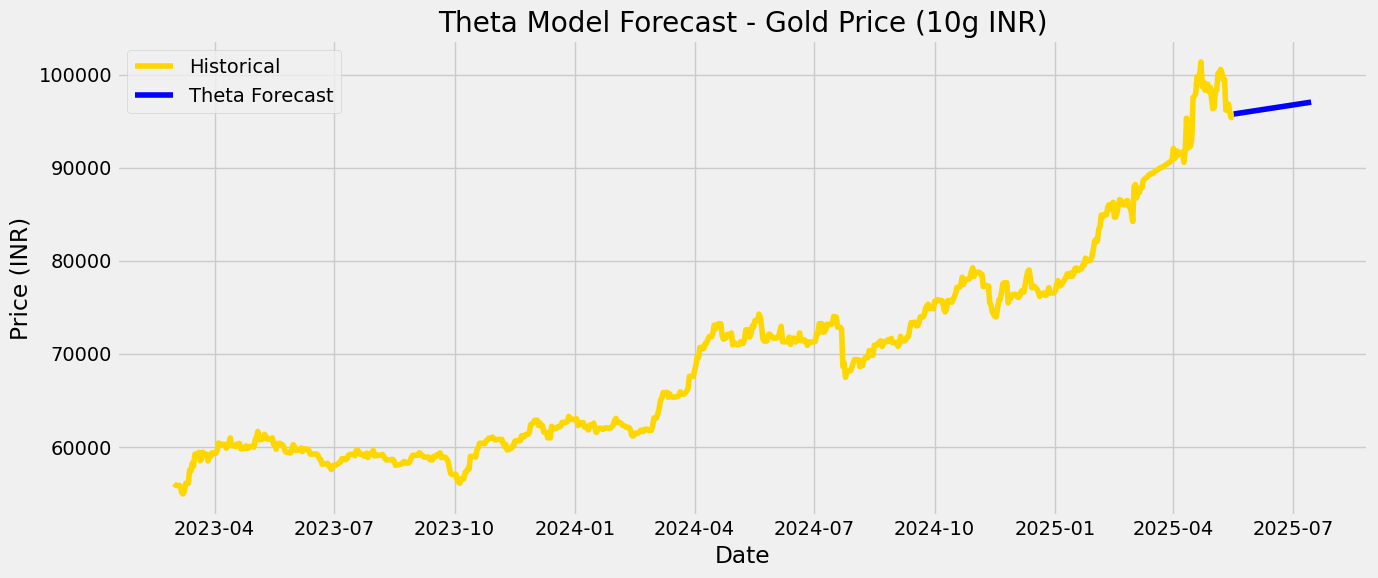

In [148]:
from statsforecast import StatsForecast
from statsforecast.models import Theta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/content/golden.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df[['Date', 'Price 10g (in INR)']]
df.columns = ['ds', 'y']
df['unique_id'] = 'gold'
df = df[['unique_id', 'ds', 'y']].sort_values('ds')
sf = StatsForecast(models=[Theta()], freq='D', n_jobs=1)
forecast_horizon = 60
forecast_df = sf.forecast(df=df, h=forecast_horizon)
actual_last60 = df.tail(forecast_horizon).reset_index(drop=True)
pred_last60   = forecast_df.tail(forecast_horizon).reset_index(drop=True)
rmse_theta = np.sqrt(mean_squared_error(actual_last60['y'], pred_last60['Theta']))
r2_theta   = r2_score(actual_last60['y'], pred_last60['Theta'])
print(f"Theta RMSE: {rmse_theta:.2f}")
print(f"Theta R² Score: {r2_theta:.4f}")
results["Model"].append("Theta")
results["RMSE"].append(rmse_theta)
results["R2"].append(r2_theta)
plt.figure(figsize=(14,6))
plt.plot(df['ds'], df['y'], label='Historical', color='gold')
plt.plot(forecast_df['ds'], forecast_df['Theta'], label='Theta Forecast', color='blue')
plt.title('Theta Model Forecast - Gold Price (10g INR)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**LSTM**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
📉 LSTM MSE: 1982364.14
📉 LSTM RMSE: 1407.96
📈 LSTM R² Score: 0.9652


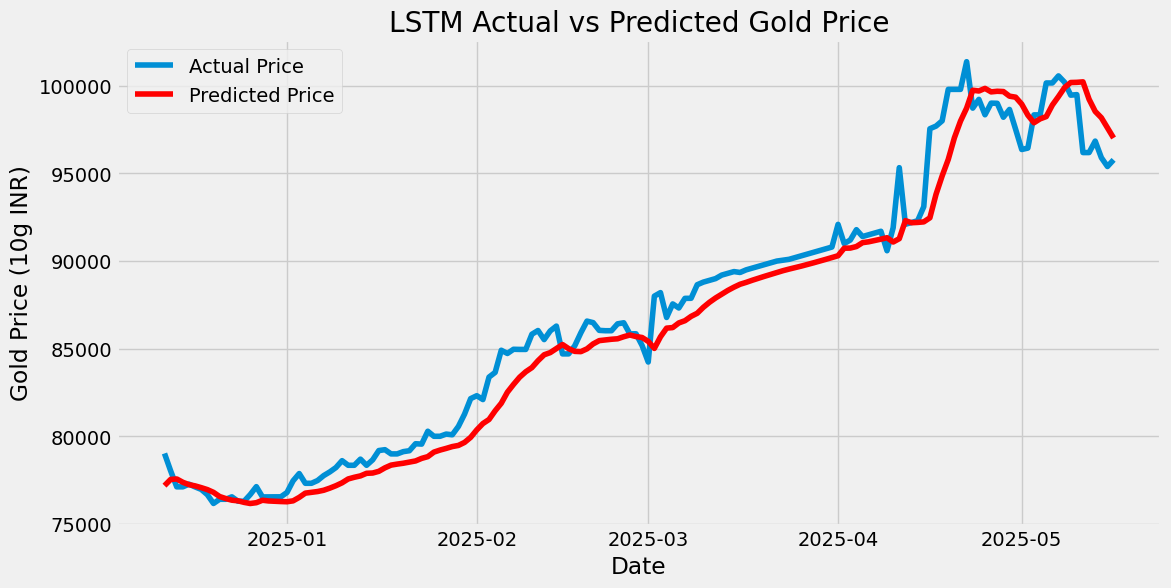

In [149]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("/content/golden.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
prices = df[["Price 10g (in INR)"]].copy()
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
seq_len = 30
X, y = create_sequences(scaled_prices, seq_len)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
y_pred_scaled = model.predict(X_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred_scaled)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"📉 LSTM MSE: {mse:.2f}")
print(f"📉 LSTM RMSE: {rmse:.2f}")
print(f"📈 LSTM R² Score: {r2:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(df.index[split+seq_len:], y_test_actual, label='Actual Price')
plt.plot(df.index[split+seq_len:], y_pred_actual, label='Predicted Price', color='red')
plt.title('LSTM Actual vs Predicted Gold Price')
plt.xlabel('Date')
plt.ylabel('Gold Price (10g INR)')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/content/golden.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
prices = df[["Price 10g (in INR)"]].copy()
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
seq_len = 30
X, y = create_sequences(scaled_prices, seq_len)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

**LSTM**

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
model = Sequential([
    LSTM(20, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)
y_pred_scaled = model.predict(X_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred_scaled)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2_lstm   = r2_score(y_test_actual, y_pred_actual)
print(f"📉 LSTM RMSE: {rmse_lstm:.2f}")
print(f"📈 LSTM R² Score: {r2_lstm:.4f}")
results["Model"].append("LSTM")
results["RMSE"].append(rmse_lstm)
results["R2"].append(r2_lstm)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0432
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0046
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0017
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6209e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.2013e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0446e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5876e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6107e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9749e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6133e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9711e-04
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2862e-04
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5422e-04
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7250e-04
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0

**COMPARISION**

📊 Model Performance Comparison:
                      Model          RMSE        R2
1             Random Forest    546.144136  0.997456
0         Linear Regression    666.376662  0.996197
2                   Prophet   1042.886327  0.929648
8                      LSTM   1301.679241  0.970246
7                     Theta   3901.624149 -0.014320
9  Ensemble (LR+RF+Prophet)   4413.625037  0.833158
5                   XGBoost  10919.343570 -1.041226
4                   SARIMAX  11796.723070 -1.395745
3                     ARIMA  12824.025106 -1.831173
6                  CatBoost  12916.604225 -1.895121


<ipython-input-159-cbd1797b85c8>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




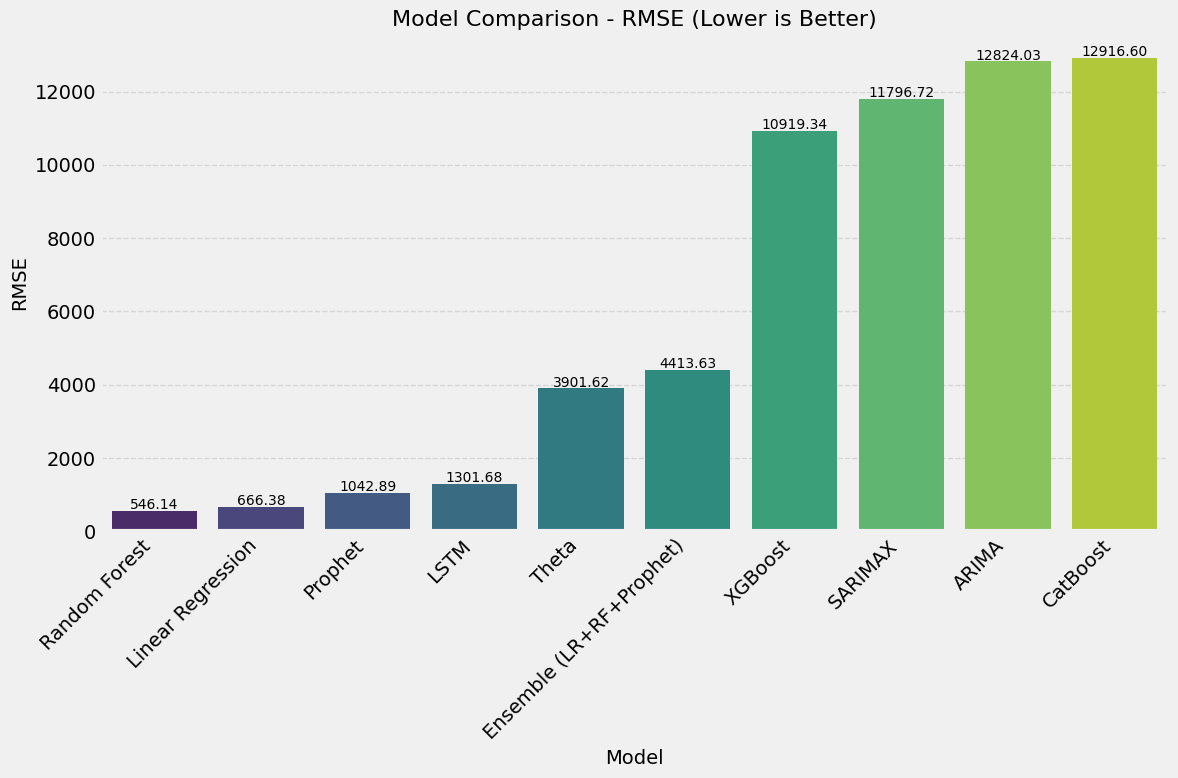

<ipython-input-159-cbd1797b85c8>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




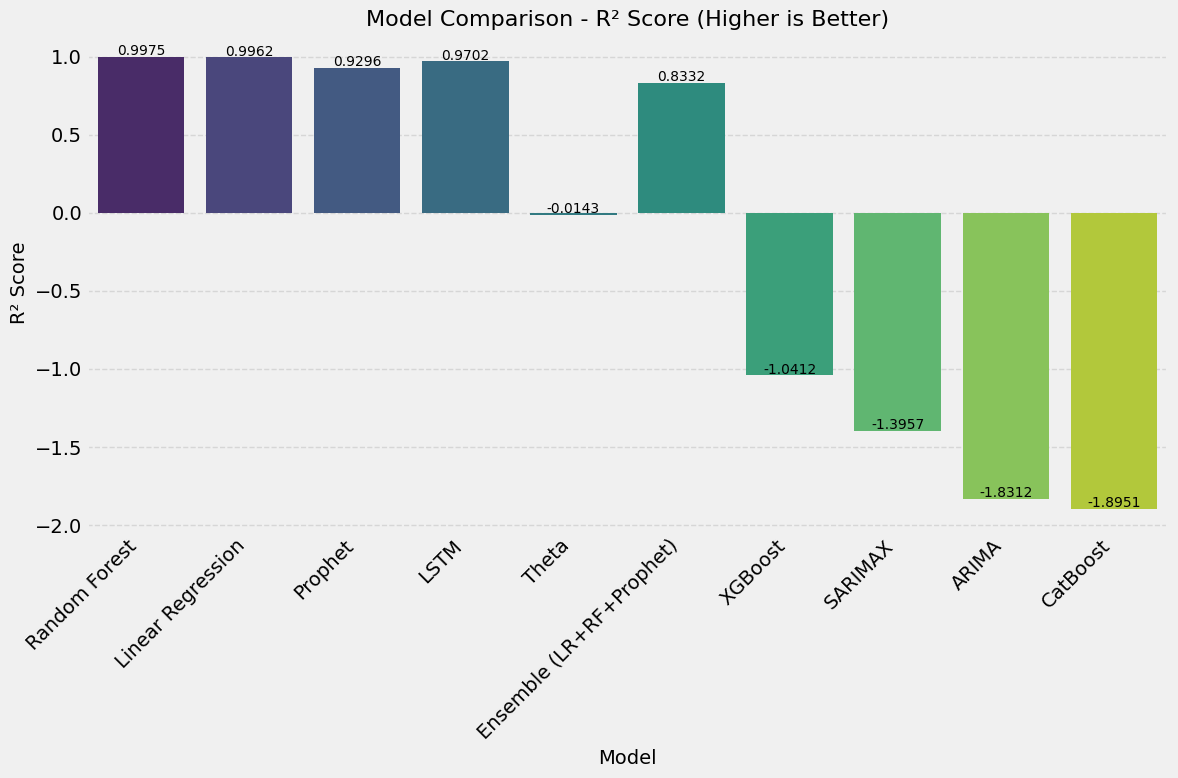

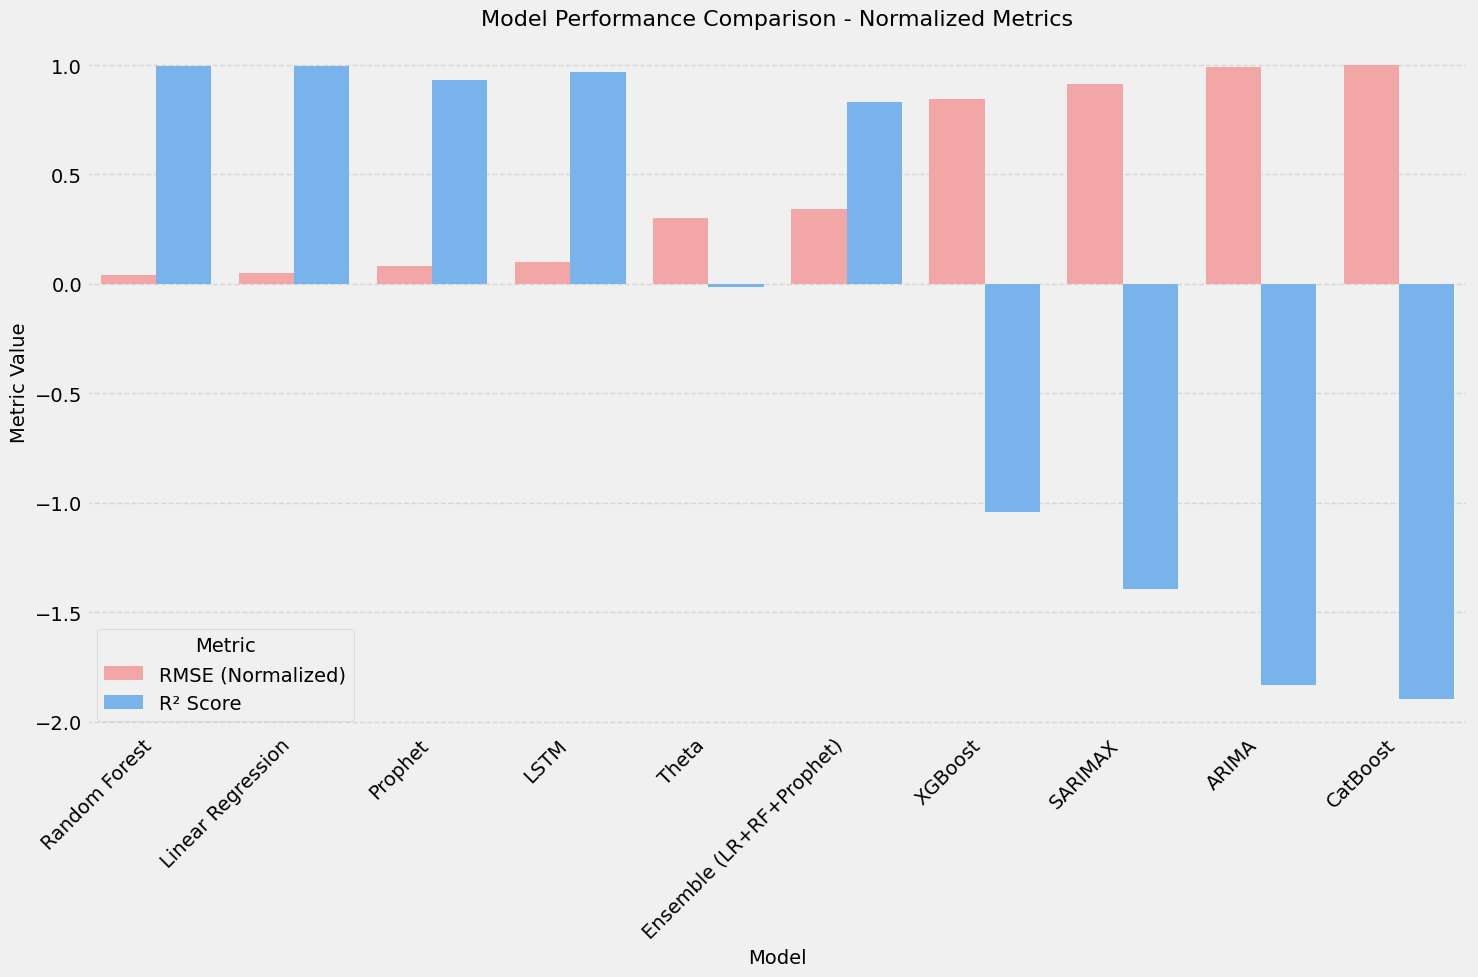

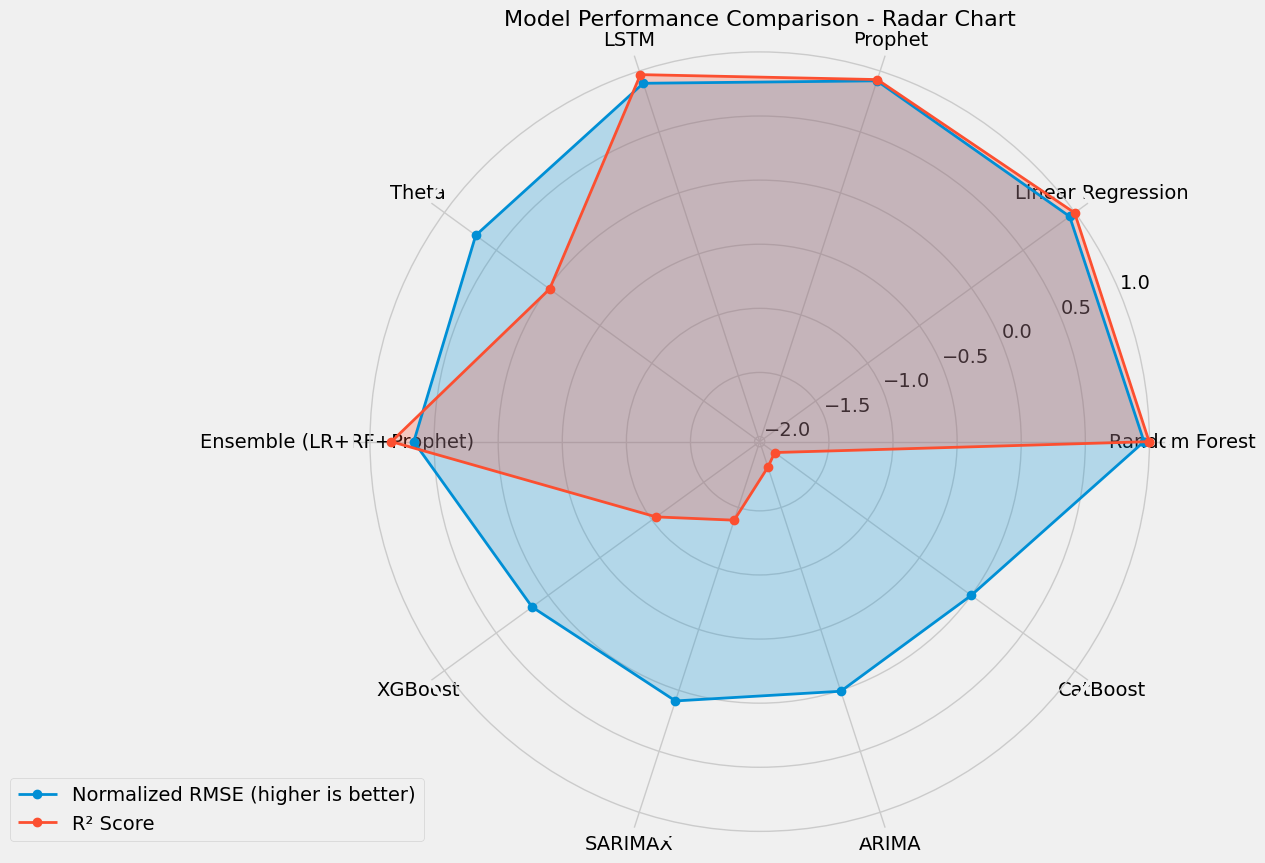


🏆 FINAL MODEL RANKING:
 Rank                    Model         RMSE        R2
    1            Random Forest   546.144136  0.997456
    2        Linear Regression   666.376662  0.996197
    3                  Prophet  1042.886327  0.929648
    4                     LSTM  1301.679241  0.970246
    5                    Theta  3901.624149 -0.014320
    6 Ensemble (LR+RF+Prophet)  4413.625037  0.833158
    7                  XGBoost 10919.343570 -1.041226
    8                  SARIMAX 11796.723070 -1.395745
    9                    ARIMA 12824.025106 -1.831173
   10                 CatBoost 12916.604225 -1.895121

🤖 MODEL RECOMMENDATION:
✅ The Random Forest model performs best on both RMSE and R² metrics.

Recommended model (Random Forest) stats:
RMSE: 546.14
R² Score: 0.9975


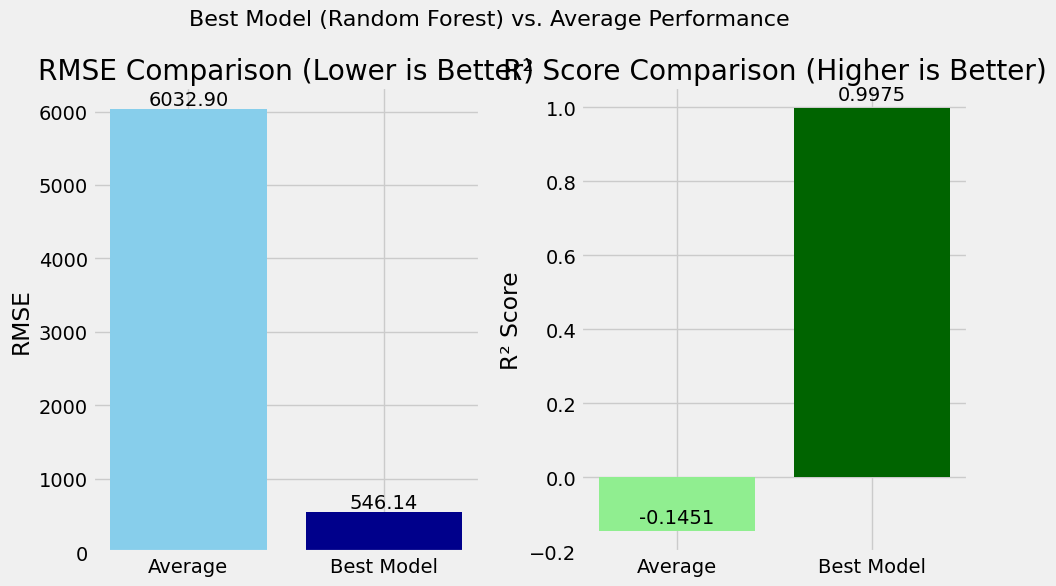


📁 Results exported to 'model_comparison_results.csv'


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')
print("📊 Model Performance Comparison:")
print(results_df)
colors = sns.color_palette('viridis', len(results_df))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('Model Comparison - RMSE (Lower is Better)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(results_df['RMSE']):
    ax.text(i, v + 50, f'{v:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')
plt.title('Model Comparison - R² Score (Higher is Better)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(results_df['R2']):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))
max_rmse = results_df['RMSE'].max()
normalized_rmse = results_df['RMSE'] / max_rmse
plot_df = pd.DataFrame({
    'Model': results_df['Model'].tolist() + results_df['Model'].tolist(),
    'Metric': ['RMSE (Normalized)'] * len(results_df) + ['R² Score'] * len(results_df),
    'Value': normalized_rmse.tolist() + results_df['R2'].tolist()
})
sns.barplot(x='Model', y='Value', hue='Metric', data=plot_df, palette=['#ff9999', '#66b3ff'])
plt.title('Model Performance Comparison - Normalized Metrics', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
def radar_chart(models, rmse_values, r2_values):
    max_rmse = max(rmse_values)
    rmse_normalized = [1 - (val / max_rmse) for val in rmse_values]
    categories = models
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    rmse_values_plot = rmse_normalized + [rmse_normalized[0]]  # Close the loop
    r2_values_plot = r2_values + [r2_values[0]]  # Close the loop
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
    ax.plot(angles, rmse_values_plot, 'o-', linewidth=2, label='Normalized RMSE (higher is better)')
    ax.fill(angles, rmse_values_plot, alpha=0.25)
    ax.plot(angles, r2_values_plot, 'o-', linewidth=2, label='R² Score')
    ax.fill(angles, r2_values_plot, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Model Performance Comparison - Radar Chart', size=16)
    plt.tight_layout()
    plt.show()
radar_chart(results_df['Model'].tolist(), results_df['RMSE'].tolist(), results_df['R2'].tolist())
fig = px.bar(
    results_df,
    x='Model',
    y='RMSE',
    title='Model Comparison - RMSE (Lower is Better)',
    color='RMSE',
    color_continuous_scale='Viridis',
    text=results_df['RMSE'].round(2)
)
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='RMSE',
    font=dict(size=14),
    xaxis={'categoryorder':'total ascending'}
)
fig.update_traces(textposition='outside')
fig.show()
fig = px.bar(
    results_df,
    x='Model',
    y='R2',
    title='Model Comparison - R² Score (Higher is Better)',
    color='R2',
    color_continuous_scale='Viridis',
    text=results_df['R2'].round(4)
)
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='R² Score',
    font=dict(size=14),
    xaxis={'categoryorder':'total descending'}
)
fig.update_traces(textposition='outside')
fig.show()
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "RMSE Comparison (Lower is Better)",
        "R² Score Comparison (Higher is Better)",
        "Normalized Metrics Comparison",
        "Model Ranking (Based on RMSE)"
    ),
    specs=[
        [{"type": "bar"}, {"type": "bar"}],
        [{"type": "bar"}, {"type": "table"}]
    ],
    vertical_spacing=0.1,
    horizontal_spacing=0.05
)
fig.add_trace(
    go.Bar(
        x=results_df['Model'],
        y=results_df['RMSE'],
        marker_color='darkblue',
        text=results_df['RMSE'].round(2),
        textposition='outside',
        name='RMSE'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=results_df['Model'],
        y=results_df['R2'],
        marker_color='darkgreen',
        text=results_df['R2'].round(4),
        textposition='outside',
        name='R² Score'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        x=results_df['Model'],
        y=results_df['RMSE']/max(results_df['RMSE']),
        name='Normalized RMSE',
        marker_color='darkred',
        opacity=0.7
    ),
    row=2, col=1
)
fig.add_trace(
    go.Bar(
        x=results_df['Model'],
        y=results_df['R2'],
        name='R² Score',
        marker_color='darkgreen',
        opacity=0.7
    ),
    row=2, col=1
)
fig.add_trace(
    go.Table(
        header=dict(
            values=['Rank', 'Model', 'RMSE', 'R² Score'],
            fill_color='paleturquoise',
            align='left',
            font=dict(size=12)
        ),
        cells=dict(
            values=[
                list(range(1, len(results_df) + 1)),
                results_df['Model'],
                results_df['RMSE'].round(2),
                results_df['R2'].round(4)
            ],
            fill_color='lavender',
            align='left',
            font=dict(size=11)
        )
    ),
    row=2, col=2
)
fig.update_layout(
    title_text='Comprehensive Model Performance Comparison',
    showlegend=False,
    height=800,
    width=1200,
)
fig.show()
summary_df = results_df.copy()
summary_df['Rank'] = summary_df['RMSE'].rank().astype(int)
summary_df = summary_df[['Rank', 'Model', 'RMSE', 'R2']]
print("\n🏆 FINAL MODEL RANKING:")
print(summary_df.to_string(index=False))
def recommend_model(results_df):
    """Analyze results and provide a recommendation on which model to use."""
    best_rmse_model = results_df.loc[results_df['RMSE'].idxmin()]['Model']
    best_r2_model = results_df.loc[results_df['R2'].idxmax()]['Model']
    print("\n🤖 MODEL RECOMMENDATION:")
    if best_rmse_model == best_r2_model:
        print(f"✅ The {best_rmse_model} model performs best on both RMSE and R² metrics.")
        recommended = best_rmse_model
    else:
        min_rmse = results_df['RMSE'].min()
        max_rmse = results_df['RMSE'].max()
        results_df['RMSE_norm'] = 1 - ((results_df['RMSE'] - min_rmse) / (max_rmse - min_rmse))
        results_df['Score'] = 0.5 * results_df['RMSE_norm'] + 0.5 * results_df['R2']
        recommended = results_df.loc[results_df['Score'].idxmax()]['Model']
        print(f"🔹 Best model for minimizing error (RMSE): {best_rmse_model}")
        print(f"🔹 Best model for explained variance (R²): {best_r2_model}")
        print(f"🔹 Recommended balanced model: {recommended}")
    rec_stats = results_df[results_df['Model'] == recommended].iloc[0]
    print(f"\nRecommended model ({recommended}) stats:")
    print(f"RMSE: {rec_stats['RMSE']:.2f}")
    print(f"R² Score: {rec_stats['R2']:.4f}")
    return recommended
best_model = recommend_model(results_df)
plt.figure(figsize=(10, 6))
avg_rmse = results_df['RMSE'].mean()
avg_r2 = results_df['R2'].mean()
best_model_stats = results_df[results_df['Model'] == best_model].iloc[0]
best_rmse = best_model_stats['RMSE']
best_r2 = best_model_stats['R2']
comparison_df = pd.DataFrame({
    'Metric': ['RMSE', 'R² Score'],
    'Average': [avg_rmse, avg_r2],
    'Best Model': [best_rmse, best_r2]
})
plt.subplot(1, 2, 1)
bars = plt.bar(['Average', 'Best Model'], [avg_rmse, best_rmse], color=['skyblue', 'darkblue'])
plt.title('RMSE Comparison (Lower is Better)')
plt.ylabel('RMSE')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{height:.2f}', ha='center', va='bottom')
plt.subplot(1, 2, 2)
bars = plt.bar(['Average', 'Best Model'], [avg_r2, best_r2], color=['lightgreen', 'darkgreen'])
plt.title('R² Score Comparison (Higher is Better)')
plt.ylabel('R² Score')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.4f}', ha='center', va='bottom')
plt.suptitle(f'Best Model ({best_model}) vs. Average Performance', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
results_df.to_csv('model_comparison_results.csv', index=False)
print("\n📁 Results exported to 'model_comparison_results.csv'")

**Trident Forecast Model**

Top Models Performance:
               Model         RMSE        R2
0  Linear Regression   666.376662  0.996197
1      Random Forest   546.144136  0.997456
2            Prophet  1042.886327  0.929648

Ensemble Weights:
Linear Regression: 0.3408
Random Forest: 0.3412
Prophet: 0.3180


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o2zwdoz/32jcvq_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o2zwdoz/0a2b8x3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56572', 'data', 'file=/tmp/tmp6o2zwdoz/32jcvq_g.json', 'init=/tmp/tmp6o2zwdoz/0a2b8x3w.json', 'output', 'file=/tmp/tmp6o2zwdoz/prophet_model9fo5rnki/prophet_model-20250517165820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:58:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


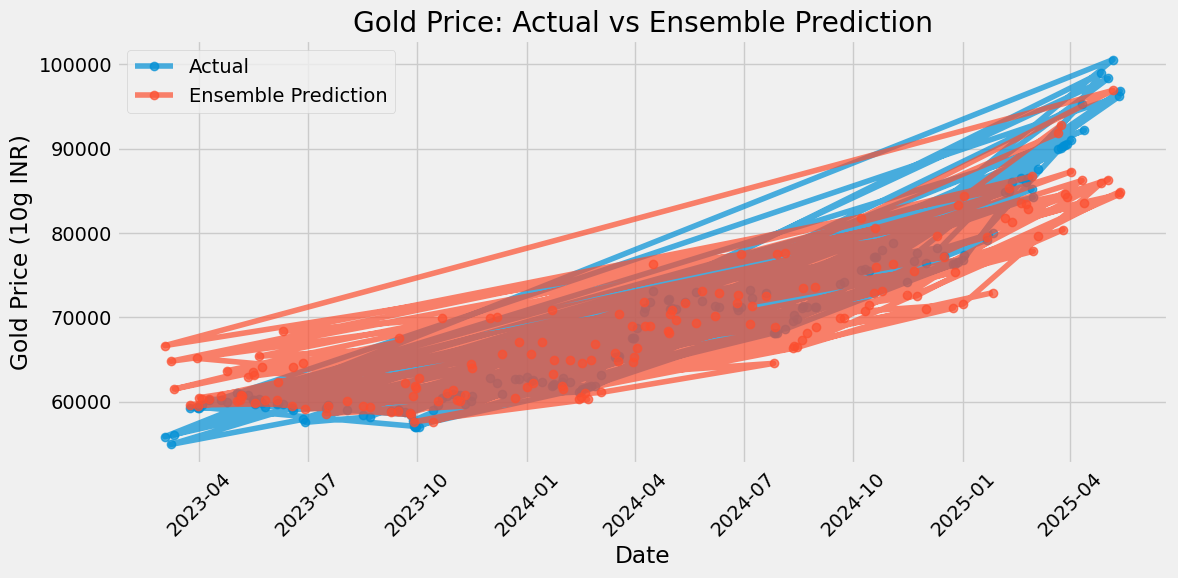


All Models Ranked by Performance (R²):
                       Model          RMSE        R2
1              Random Forest    546.144136  0.997456
0          Linear Regression    666.376662  0.996197
8                       LSTM   1301.679241  0.970246
2                    Prophet   1042.886327  0.929648
11          Trident Forecast   4413.625037  0.833158
12          Trident Forecast   4413.625037  0.833158
9           Trident Forecast   4413.625037  0.833158
10  Ensemble (LR+RF+Prophet)   4413.625037  0.833158
7                      Theta   3901.624149 -0.014320
5                    XGBoost  10919.343570 -1.041226
4                    SARIMAX  11796.723070 -1.395745
3                      ARIMA  12824.025106 -1.831173
6                   CatBoost  12916.604225 -1.895121

Future Gold Price Predictions (30 days):
        Date      Ensemble
0 2025-05-17  95411.665862
1 2025-05-18  95412.705403
2 2025-05-19  95439.697477
3 2025-05-20  95432.848170
4 2025-05-21  95435.843236
5 2025-05-22  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



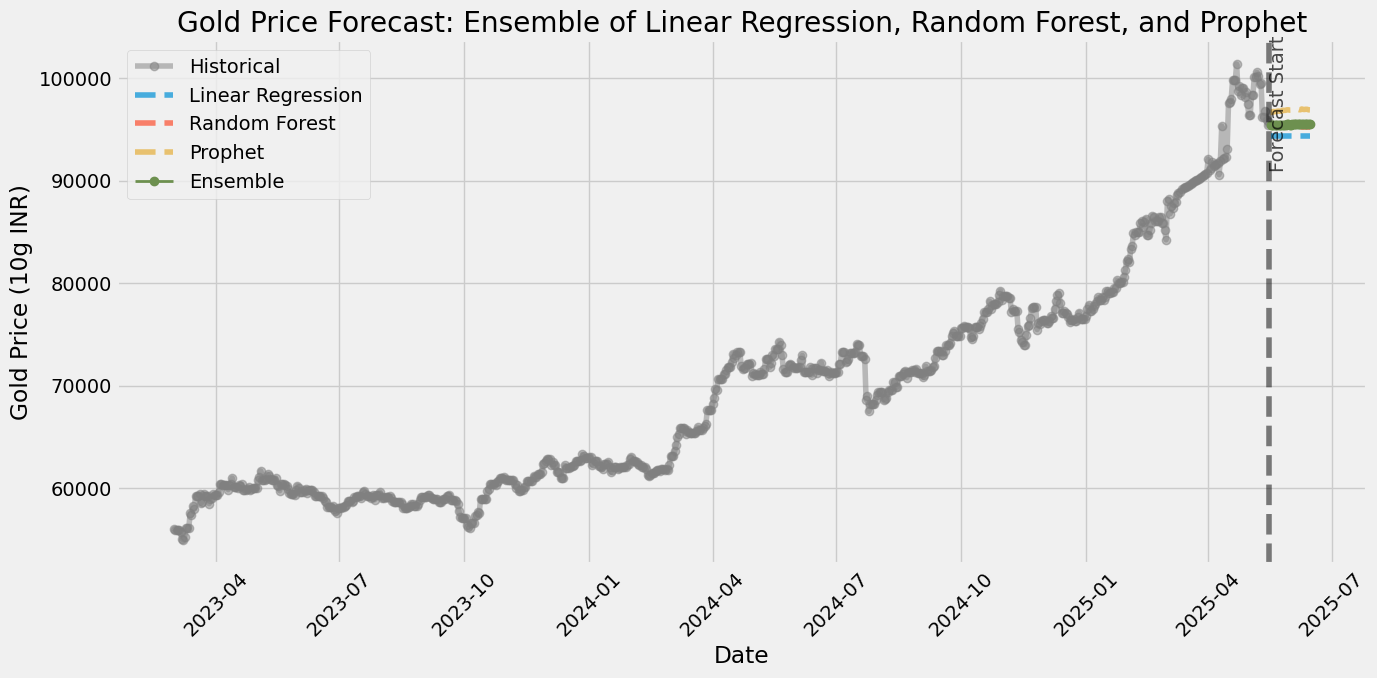

Forecast saved to 'gold_price_ensemble_forecast.csv'

All Models Including Trident Forecast (Ranked by R²):
                       Model          RMSE        R2
1              Random Forest    546.144136  0.997456
0          Linear Regression    666.376662  0.996197
8                       LSTM   1301.679241  0.970246
2                    Prophet   1042.886327  0.929648
9           Trident Forecast   4413.625037  0.833158
11          Trident Forecast   4413.625037  0.833158
12          Trident Forecast   4413.625037  0.833158
13          Trident Forecast   4413.625037  0.833158
10  Ensemble (LR+RF+Prophet)   4413.625037  0.833158
7                      Theta   3901.624149 -0.014320
5                    XGBoost  10919.343570 -1.041226
4                    SARIMAX  11796.723070 -1.395745
3                      ARIMA  12824.025106 -1.831173
6                   CatBoost  12916.604225 -1.895121
✅ Complete results saved to 'gold_price_complete_results.csv'


In [169]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
model_results = pd.DataFrame(results)
top_models = model_results[model_results['Model'].isin(['Linear Regression', 'Random Forest', 'Prophet'])]
print("Top Models Performance:")
print(top_models)
r2_values = top_models['R2'].values
weights = r2_values / np.sum(r2_values)
print("\nEnsemble Weights:")
for model, weight in zip(top_models['Model'], weights):
    print(f"{model}: {weight:.4f}")
def ensemble_predict(X_test_scaled, test_dates, test_df, models_dict, weights):
    """
    Make predictions using ensemble of models with given weights
    Parameters:
    -----------
    X_test_scaled : array-like
        Scaled features for ML models (Linear Regression, Random Forest)
    test_dates : array-like
        Dates for Prophet model prediction
    test_df : DataFrame
        Test dataframe with regressors for Prophet
    models_dict : dict
        Dictionary containing trained models
    weights : array-like
        Weights for each model in the ensemble
    Returns:
    --------
    array-like
        Weighted ensemble predictions
    """
    lr_preds = models_dict['Linear Regression'].predict(X_test_scaled)
    rf_preds = models_dict['Random Forest'].predict(X_test_scaled)
    future = pd.DataFrame({'ds': test_dates})
    for reg in ['USD_INR', 'Import_Duty', 'Inflation_CPI', 'GGP_LBMA', 'NIF']:
        if reg in test_df.columns:
            future[reg] = test_df[reg].values
    prophet_forecast = models_dict['Prophet'].predict(future)
    prophet_preds = prophet_forecast['yhat'].values
    all_preds = np.column_stack([lr_preds, rf_preds, prophet_preds])
    ensemble_preds = np.sum(all_preds * weights, axis=1)
    return ensemble_preds
df = pd.read_csv("/content/golden.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.columns = [
    "Date", "Gold_Price_10g_INR", "GGP_LBMA",
    "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"
]
numeric_cols = ["Gold_Price_10g_INR", "GGP_LBMA", "USD_INR",
                "Import_Duty", "Inflation_CPI", "NIF"]
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
X = df[["GGP_LBMA", "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"]]
y = df["Gold_Price_10g_INR"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_dates = df.loc[X_test.index, "Date"].values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
prophet_df = pd.DataFrame({
    'ds': df["Date"],
    'y': df["Gold_Price_10g_INR"]
})
for reg in ["USD_INR", "Import_Duty", "Inflation_CPI", "GGP_LBMA", "NIF"]:
    prophet_df[reg] = df[reg]
prophet_model = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_mode='additive',
    yearly_seasonality=True
)
for reg in ["USD_INR", "Import_Duty", "Inflation_CPI", "GGP_LBMA", "NIF"]:
    prophet_model.add_regressor(reg)
prophet_model.fit(prophet_df)
models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'Prophet': prophet_model
}
test_df = df.loc[X_test.index]
ensemble_preds = ensemble_predict(X_test_scaled, test_dates, test_df, models, weights)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
ensemble_r2 = r2_score(y_test, ensemble_preds)

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test.values, 'o-', label='Actual', alpha=0.7)
plt.plot(test_dates, ensemble_preds, 'o-', label='Ensemble Prediction', alpha=0.7)
plt.title('Gold Price: Actual vs Ensemble Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price (10g INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R2', ascending=False)
print("\nAll Models Ranked by Performance (R²):")
print(results_df)
last_date = df["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
last_features = X.iloc[-1].values.reshape(1, -1)
future_features = np.repeat(last_features, 30, axis=0)
future_features_scaled = scaler.transform(future_features)
prophet_future = pd.DataFrame({'ds': future_dates})
for i, reg in enumerate(["GGP_LBMA", "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"]):
    prophet_future[reg] = future_features[:, i]
lr_future_preds = lr_model.predict(future_features_scaled)
rf_future_preds = rf_model.predict(future_features_scaled)
prophet_future_forecast = prophet_model.predict(prophet_future)
prophet_future_preds = prophet_future_forecast['yhat'].values
future_all_preds = np.column_stack([lr_future_preds, rf_future_preds, prophet_future_preds])
future_ensemble_preds = np.sum(future_all_preds * weights, axis=1)
future_pred_df = pd.DataFrame({
    'Date': future_dates,
    'Linear_Regression': lr_future_preds,
    'Random_Forest': rf_future_preds,
    'Prophet': prophet_future_preds,
    'Ensemble': future_ensemble_preds
})
print("\nFuture Gold Price Predictions (30 days):")
print(future_pred_df[['Date', 'Ensemble']].head(10))
plt.figure(figsize=(14, 7))
plt.plot(df["Date"], df["Gold_Price_10g_INR"], 'o-', label='Historical', alpha=0.5, color='gray')
plt.plot(future_pred_df['Date'], future_pred_df['Linear_Regression'], '--', label='Linear Regression', alpha=0.7)
plt.plot(future_pred_df['Date'], future_pred_df['Random_Forest'], '--', label='Random Forest', alpha=0.7)
plt.plot(future_pred_df['Date'], future_pred_df['Prophet'], '--', label='Prophet', alpha=0.7)
plt.plot(future_pred_df['Date'], future_pred_df['Ensemble'], 'o-', label='Ensemble', linewidth=2)
plt.axvline(x=last_date, color='black', linestyle='--', alpha=0.5)
plt.text(last_date, df["Gold_Price_10g_INR"].max()*0.9, 'Forecast Start', rotation=90, alpha=0.7)
plt.title('Gold Price Forecast: Ensemble of Linear Regression, Random Forest, and Prophet')
plt.xlabel('Date')
plt.ylabel('Gold Price (10g INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
future_pred_df.to_csv('gold_price_ensemble_forecast.csv', index=False)
print("Forecast saved to 'gold_price_ensemble_forecast.csv'")

# Calculate metrics for Trident Forecast (using the ensemble predictions)
rmse_Trident = ensemble_rmse  # Reuse the ensemble RMSE since it's the same model
r2_Trident = ensemble_r2      # Reuse the ensemble R2 since it's the same model

# Add Trident Forecast to results dictionary
results["Model"].append("Trident Forecast")
results["RMSE"].append(rmse_Trident)
results["R2"].append(r2_Trident)

# Create updated dataframe and display sorted results
updated_results_df = pd.DataFrame(results)
updated_results_df = updated_results_df.sort_values('R2', ascending=False)
print("\nAll Models Including Trident Forecast (Ranked by R²):")
print(updated_results_df)

# Save the updated results to CSV
updated_results_df.to_csv('gold_price_complete_results.csv', index=False)
print("✅ Complete results saved to 'gold_price_complete_results.csv'")


In [170]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from ipywidgets import DatePicker, Button, VBox
from IPython.display import display

def predict_ensemble_price(target_date_str, df, models, weights, scaler):
    target_date = pd.to_datetime(target_date_str)
    last_known_date = df["Date"].max()

    if target_date <= last_known_date:
        print(f"❌ The date {target_date.date()} is within or before the last known date ({last_known_date.date()}).")
        return

    days_ahead = (target_date - last_known_date).days

    # Prepare features
    last_features = df[["GGP_LBMA", "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"]].iloc[-1].values.reshape(1, -1)
    future_features = np.repeat(last_features, days_ahead, axis=0)
    scaled_future = scaler.transform(future_features)

    # Prophet prediction
    future_dates = pd.date_range(start=last_known_date + timedelta(days=1), periods=days_ahead)
    prophet_future = pd.DataFrame({'ds': future_dates})
    for i, reg in enumerate(["GGP_LBMA", "USD_INR", "Import_Duty", "Inflation_CPI", "NIF"]):
        prophet_future[reg] = future_features[:, i]
    prophet_preds = models["Prophet"].predict(prophet_future)["yhat"].values

    # ML model predictions
    lr_preds = models["Linear Regression"].predict(scaled_future)
    rf_preds = models["Random Forest"].predict(scaled_future)

    # Ensemble prediction
    all_preds = np.column_stack([lr_preds, rf_preds, prophet_preds])
    ensemble_preds = np.sum(all_preds * weights, axis=1)

    # Final prediction for target date
    predicted_price = ensemble_preds[days_ahead - 1]
    print(f"📆 Predicted Gold Price on {target_date.date()} using Trident Forecast: ₹{predicted_price:,.2f}")

# --- Add calendar widget ---
def create_calendar_predictor(df, models, weights, scaler):
    date_picker = DatePicker(
        description='Select Date:',
        disabled=False,
        min=df["Date"].max() + timedelta(days=1)
    )
    button = Button(description="Predict")

    def on_button_click(b):
        if date_picker.value is None:
            print("⚠️ Please select a date from the calendar.")
        else:
            predict_ensemble_price(date_picker.value.strftime("%Y-%m-%d"), df, models, weights, scaler)

    button.on_click(on_button_click)
    display(VBox([date_picker, button]))

# 👉 To use it in a cell:
# create_calendar_predictor(df, models, weights, scaler)


In [156]:
create_calendar_predictor(df, models, weights, scaler)

In [171]:
# Replace "Ensemble (LR+RF+Prophet)" with "Trident Forecast" in the results dictionary
ensemble_index = results["Model"].index("Ensemble (LR+RF+Prophet)") if "Ensemble (LR+RF+Prophet)" in results["Model"] else -1
if ensemble_index >= 0:
    results["Model"][ensemble_index] = "Trident Forecast"

# Update the results dataframe
results_df = pd.DataFrame(results).sort_values("R2", ascending=False)

custom_name = "Trident Forecast"

# Now visualize with the updated names
# [rest of visualization code remains the same]

<ipython-input-172-b691b1d0c30e>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-172-b691b1d0c30e>:21: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



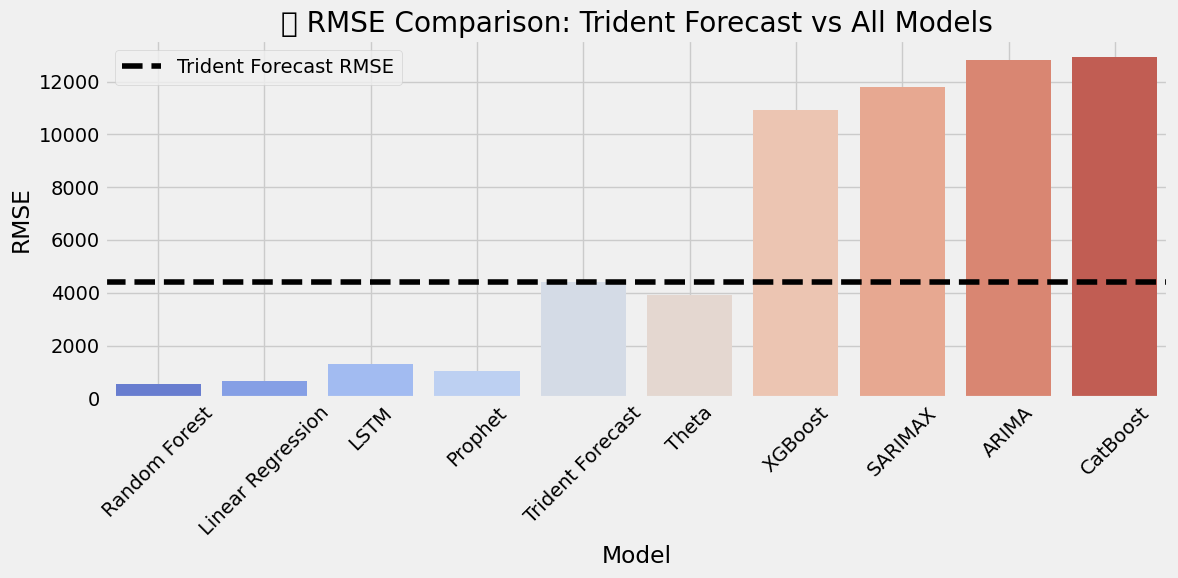

<ipython-input-172-b691b1d0c30e>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-172-b691b1d0c30e>:33: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



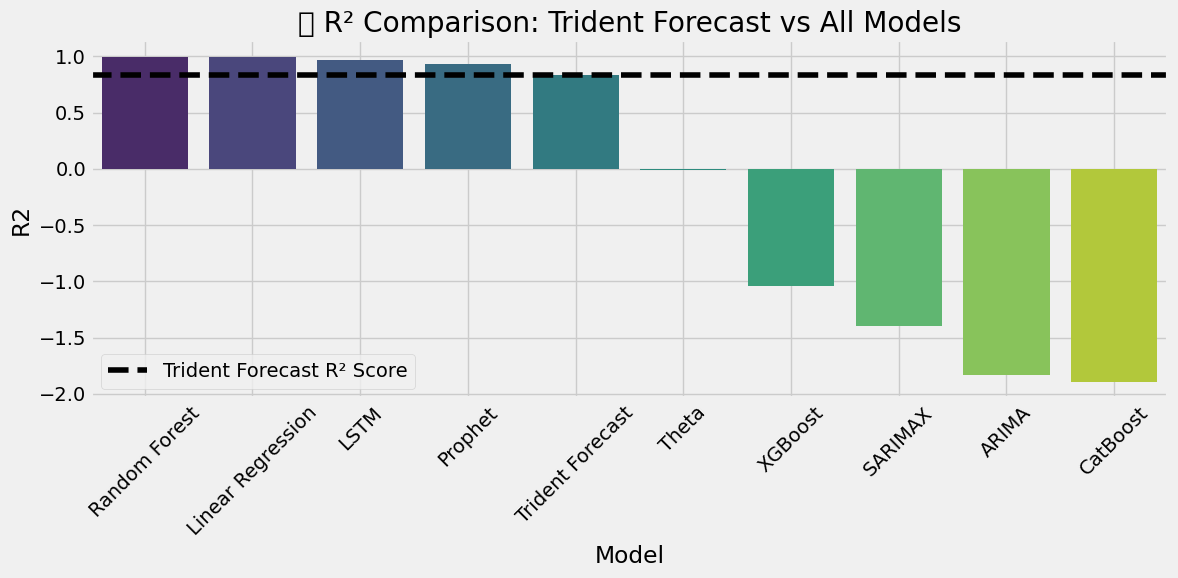

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported for DataFrame operations
import numpy as np # Ensure numpy is imported

results_df = pd.DataFrame(results).sort_values("R2", ascending=False)

# Define the variable 'custom_name' with the name of the ensemble model
custom_name = "Trident Forecast"

# 📊 Visual Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="coolwarm")
# Check if the custom_name model exists in the results_df before plotting the horizontal line
if custom_name in results_df['Model'].values:
    plt.axhline(y=results_df[results_df['Model'] == custom_name]["RMSE"].values[0], color='black', linestyle='--', label=f'{custom_name} RMSE')
plt.title("📉 RMSE Comparison: Trident Forecast vs All Models")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2", data=results_df, palette="viridis")
# Check if the custom_name model exists in the results_df before plotting the horizontal line
if custom_name in results_df['Model'].values:
    plt.axhline(y=results_df[results_df['Model'] == custom_name]["R2"].values[0], color='black', linestyle='--', label=f'{custom_name} R² Score')
plt.title("📈 R² Comparison: Trident Forecast vs All Models")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [174]:
import nbformat
import os  # Import the os module to check file existence
notebook_path = '/content/SA.ipynb'  # Path to your notebook file
output_path = '/content/SD_code_only.py'  # Where to save the extracted code
if not os.path.exists(notebook_path):
    print(f"Error: The notebook file was not found at {notebook_path}")
    print("Please check the path and make sure the file exists.")
else:
    with open(notebook_path, 'r', encoding='utf-8') as nb_file:
        nb = nbformat.read(nb_file, as_version=4)
    code_cells = [cell['source'] for cell in nb['cells'] if cell['cell_type'] == 'code']
    code_str = '\n\n'.join(code_cells)
    with open(output_path, 'w', encoding='utf-8') as py_file:
        py_file.write(code_str)
    print(f"Code cells extracted and saved to: {output_path}")

Code cells extracted and saved to: /content/SD_code_only.py
